# Naive Bayes

Start of data transformation...
End of data transformation...

=== Relatório de Classificação ===
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      4521
           1       0.75      1.00      0.86     13468

    accuracy                           0.75     17989
   macro avg       0.37      0.50      0.43     17989
weighted avg       0.56      0.75      0.64     17989

Accuracy: 0.7487
Precision: 0.7487
Recall: 1.0000
F1-score: 0.8563
Balanced Accuracy: 0.5000
Geometric Mean Accuracy: 0.8653


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


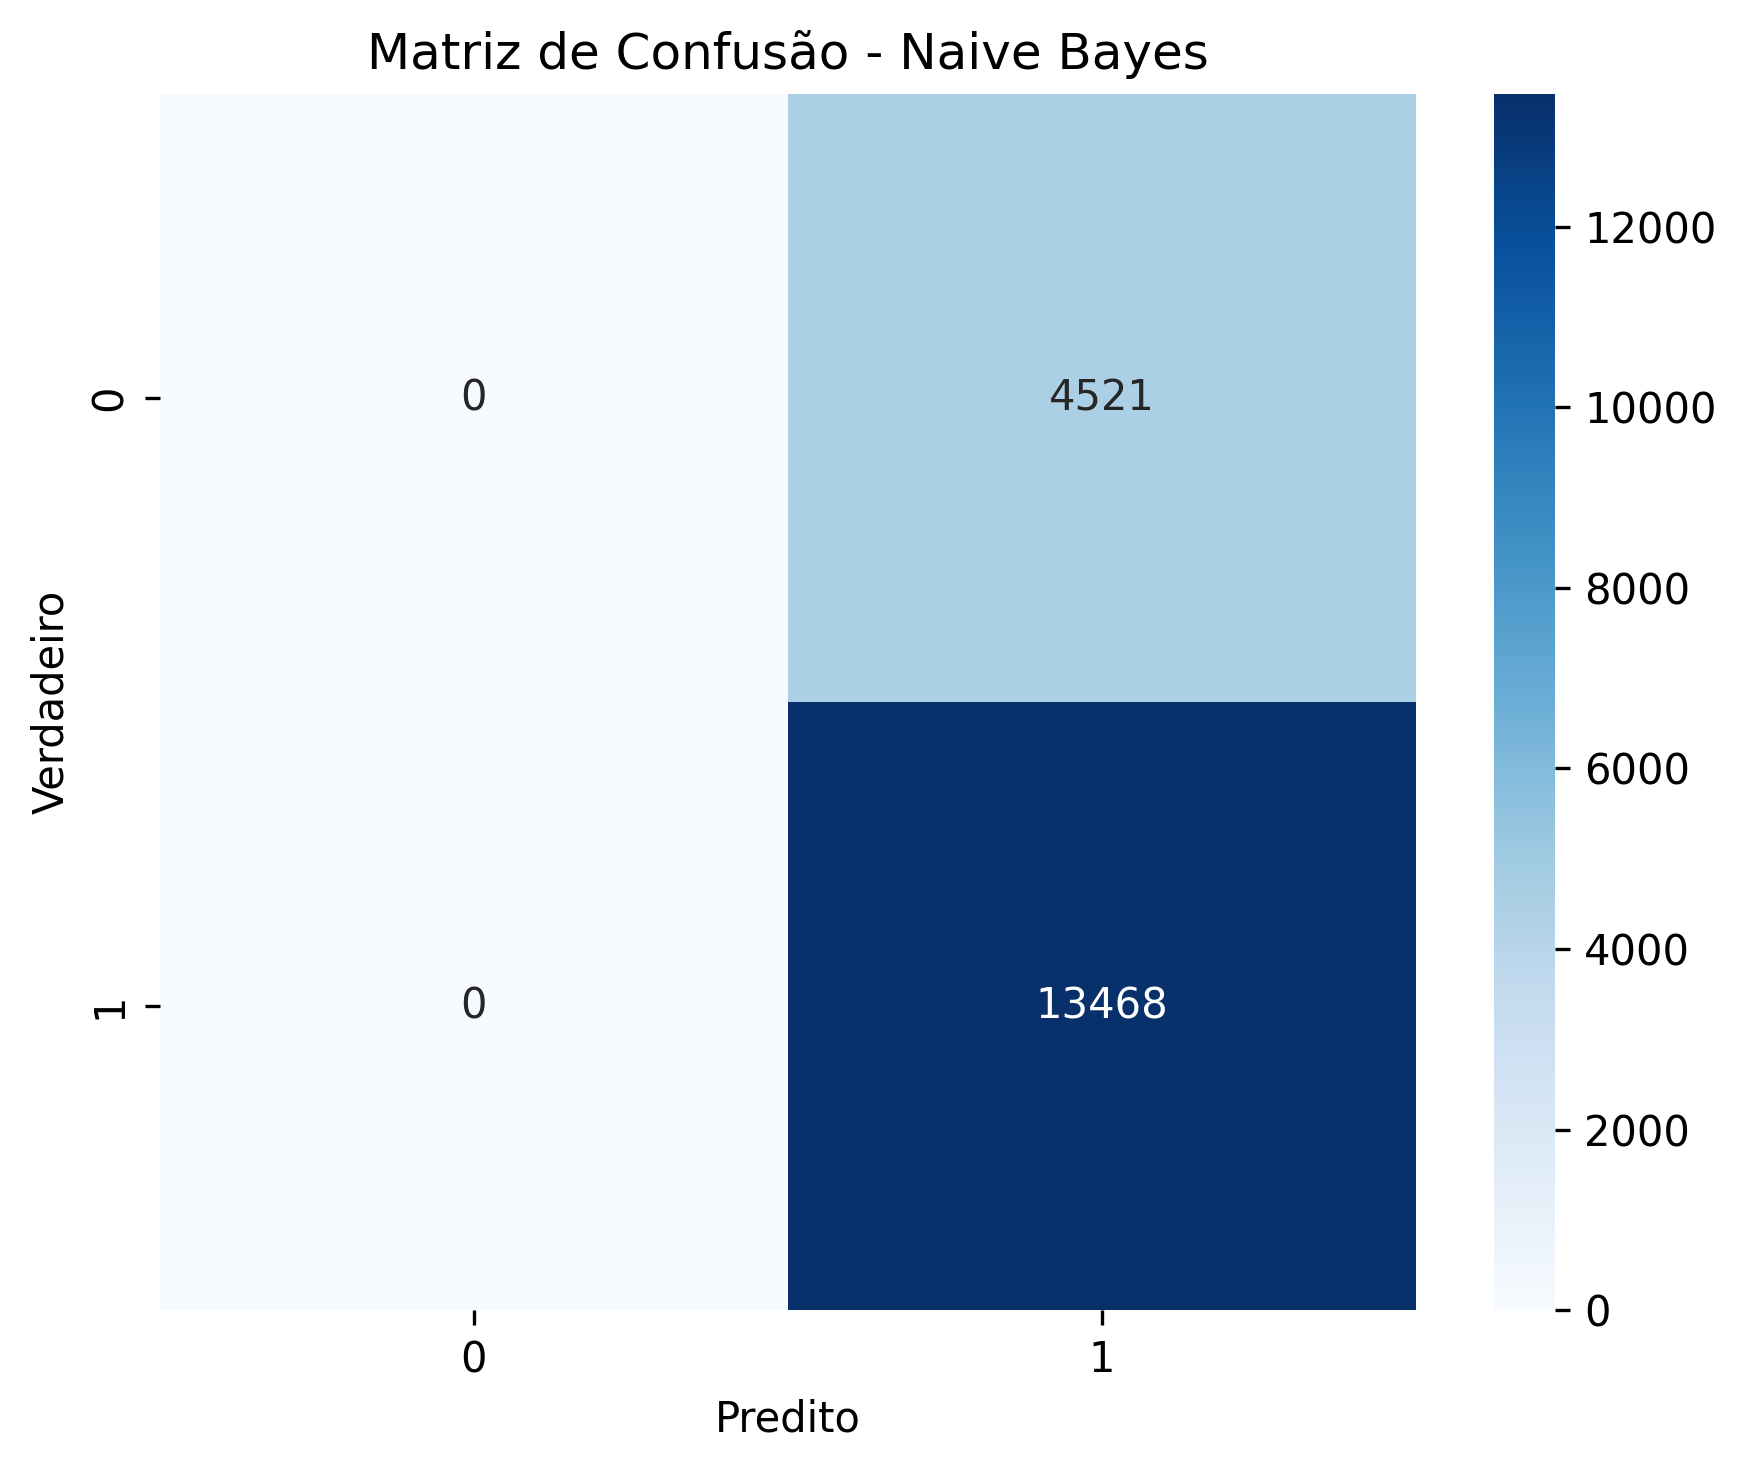

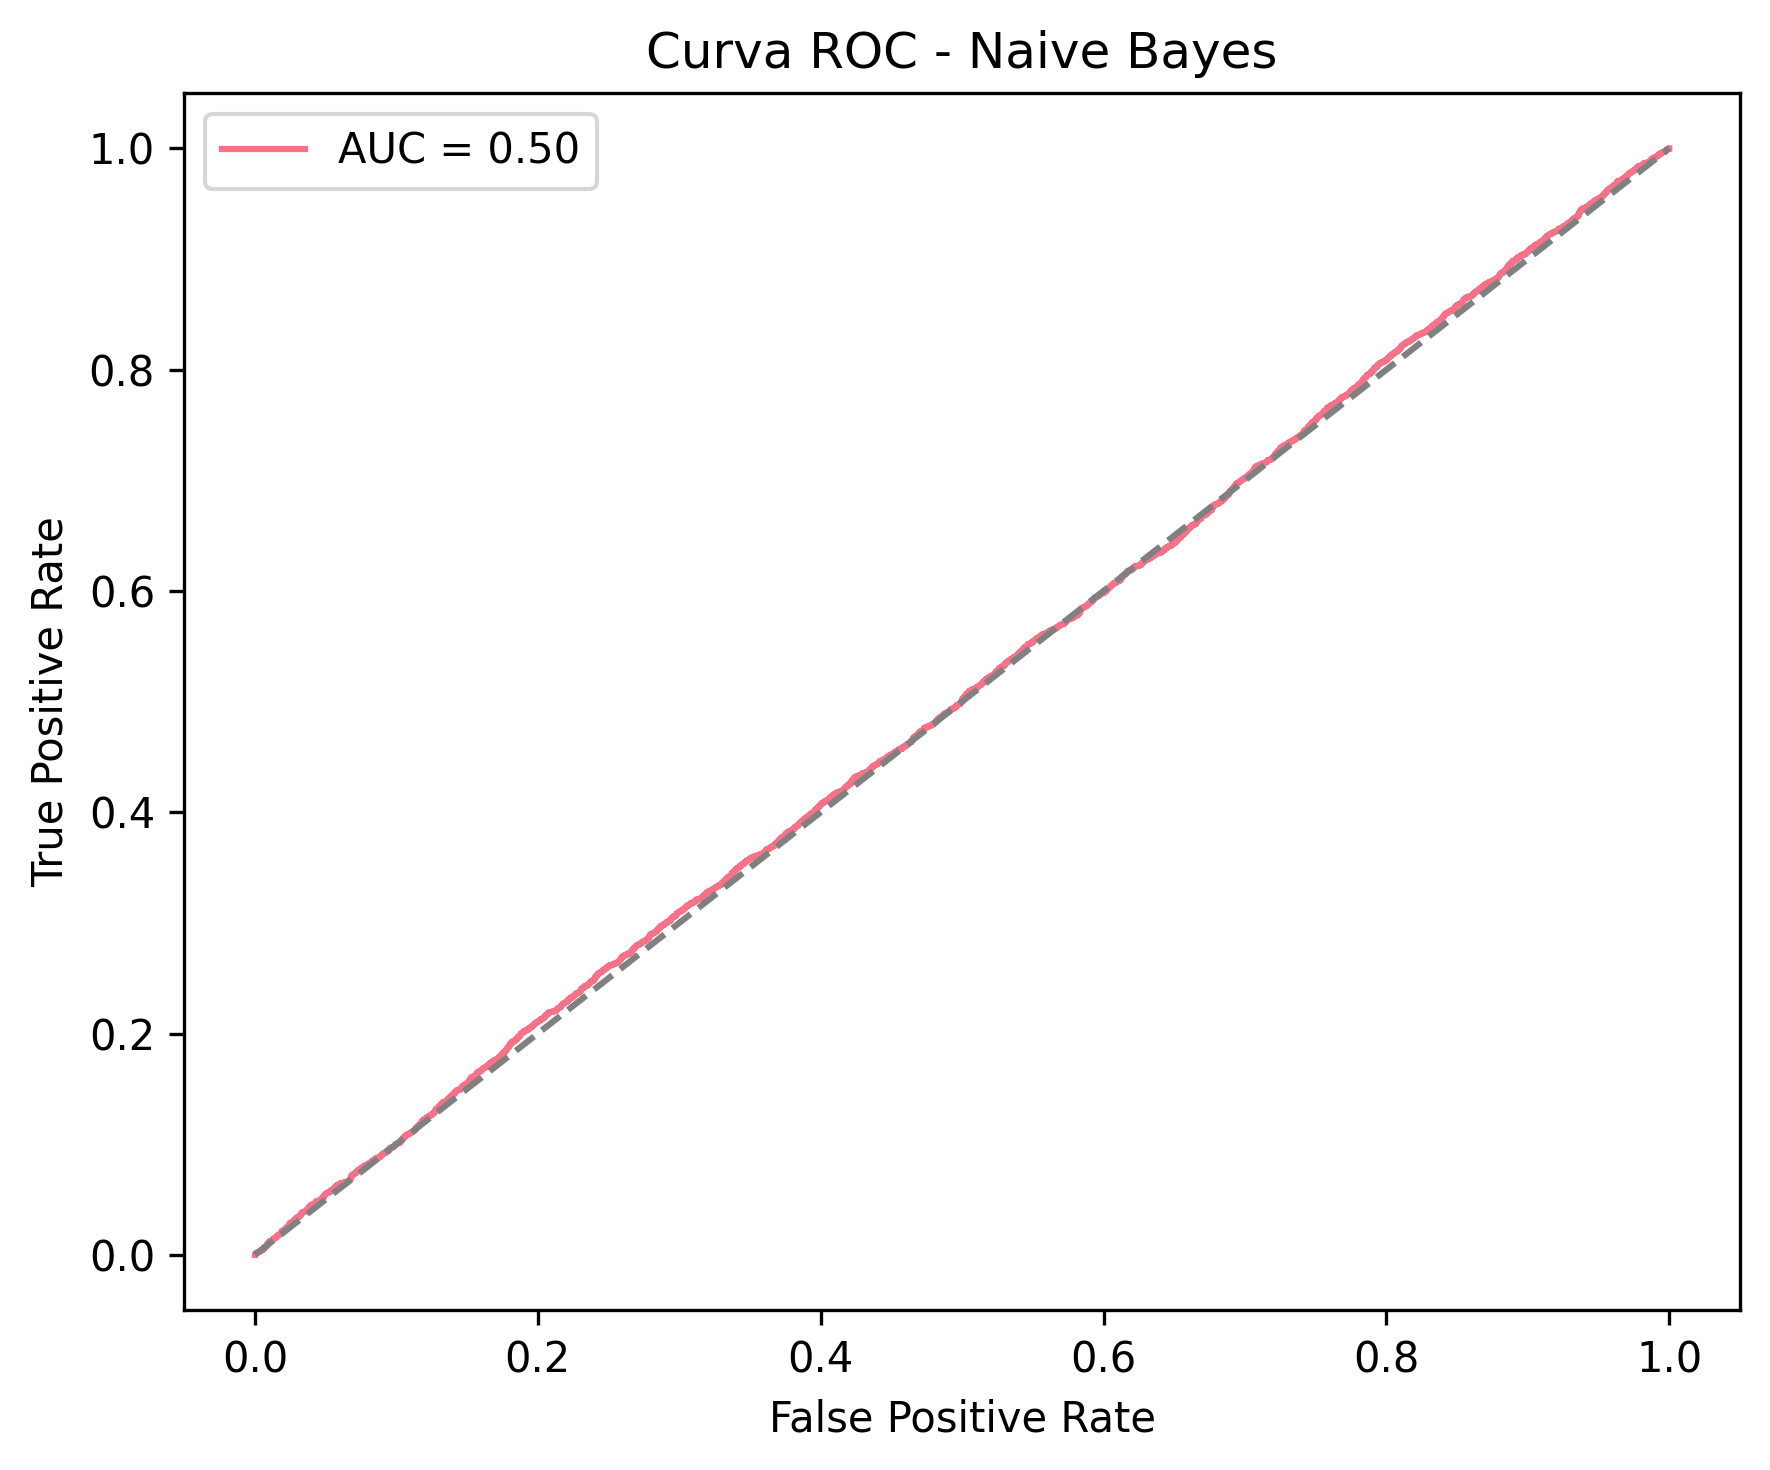

In [9]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (classification_report, accuracy_score, precision_score,
                             recall_score, f1_score, confusion_matrix, roc_curve,
                             roc_auc_score, balanced_accuracy_score)
from scipy.stats import gmean

# Configurações globais de visualização
sns.set_palette("husl")
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

# Diretórios para salvar os gráficos
os.makedirs("graphs", exist_ok=True)
os.makedirs("cluster_graphs", exist_ok=True)

# ----------------------
# 1. PREPARAÇÃO DE DADOS
# ----------------------
df = pd.read_csv('/content/drive/MyDrive/colorectal_cancer_prediction.csv')

targets = ['Survival_Status', 'Chemotherapy_Received',
           'Radiotherapy_Received', 'Surgery_Received']
features = df.drop(columns=targets)

numeric_features = features.select_dtypes(include=np.number).columns.tolist()
categorical_features = features.select_dtypes(exclude=np.number).columns.tolist()

print("Start of data transformation...")

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

preprocessed_data = preprocessor.fit_transform(features)

numeric_names = numeric_features
categorical_names = preprocessor.named_transformers_['cat'].named_steps['onehot']\
    .get_feature_names_out(categorical_features)
all_feature_names = np.concatenate([numeric_names, categorical_names])

if hasattr(preprocessed_data, "toarray"):
    preprocessed_df = pd.DataFrame(preprocessed_data.toarray(), columns=all_feature_names)
else:
    preprocessed_df = pd.DataFrame(preprocessed_data, columns=all_feature_names)

print("End of data transformation...")

# ----------------------
# 2. MODELAGEM - NAIVE BAYES SEM BALANCEAMENTO
# ----------------------
target_var = 'Survival_Status'
y = df[target_var].copy()
if y.dtype == 'O':
    y = y.astype(str)
    y = y.map({label: idx for idx, label in enumerate(sorted(y.unique()))})

X_train, X_test, y_train, y_test = train_test_split(
    preprocessed_df, y, test_size=0.2, random_state=42, stratify=y
)

modelo = GaussianNB()
modelo.fit(X_train, y_train)
y_pred = modelo.predict(X_test)
y_prob = modelo.predict_proba(X_test)[:, 1] if len(modelo.classes_) == 2 else None

print("\n=== Relatório de Classificação ===")
print(classification_report(y_test, y_pred))

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='binary')
rec = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')
bal_acc = balanced_accuracy_score(y_test, y_pred)
gmean_score = gmean([prec, rec]) if prec > 0 and rec > 0 else 0

print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"Balanced Accuracy: {bal_acc:.4f}")
print(f"Geometric Mean Accuracy: {gmean_score:.4f}")

# Matriz de confusão
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=modelo.classes_, yticklabels=modelo.classes_)
plt.xlabel("Predito")
plt.ylabel("Verdadeiro")
plt.title("Matriz de Confusão - Naive Bayes")
plt.tight_layout()
plt.savefig("graphs/confusion_matrix_naive_bayes.png")
plt.show()

# Curva ROC (se binária)
if y_prob is not None:
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    auc_score = roc_auc_score(y_test, y_prob)
    plt.figure(figsize=(6, 5))
    plt.plot(fpr, tpr, label=f"AUC = {auc_score:.2f}")
    plt.plot([0, 1], [0, 1], '--', color='gray')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Curva ROC - Naive Bayes")
    plt.legend()
    plt.tight_layout()
    plt.savefig("graphs/roc_curve_naive_bayes.png")
    plt.show()


# Naive Bayes Oversampling

Start of data transformation...
End of data transformation...

=== Relatório de Classificação ===
              precision    recall  f1-score   support

           0       0.25      0.52      0.34      4521
           1       0.75      0.48      0.58     13468

    accuracy                           0.49     17989
   macro avg       0.50      0.50      0.46     17989
weighted avg       0.62      0.49      0.52     17989

Accuracy: 0.4889
Precision: 0.7490
Recall: 0.4774
F1-score: 0.5831
Balanced Accuracy: 0.5003
Geometric Mean Accuracy: 0.5979


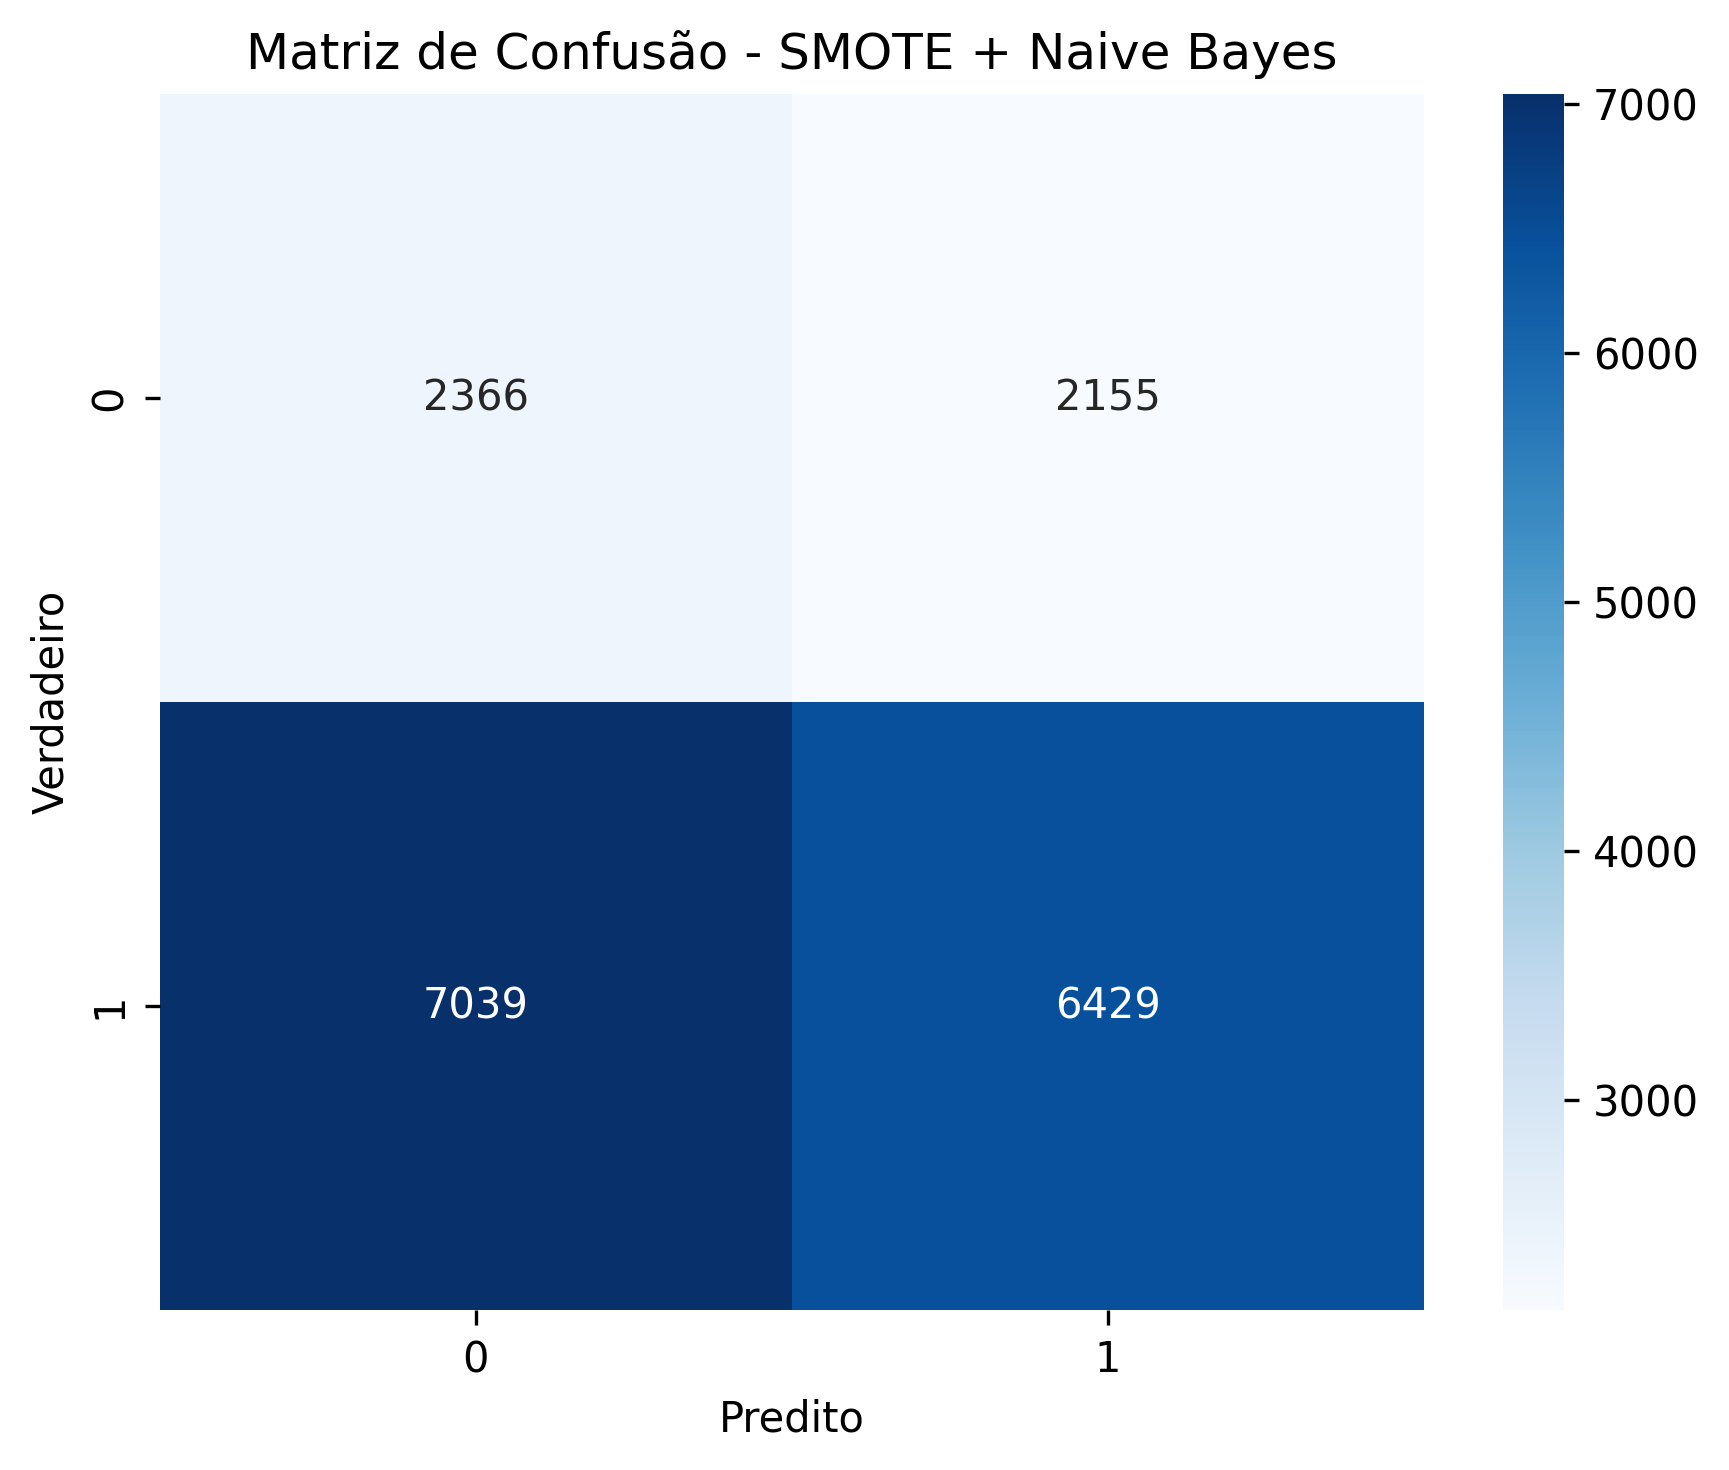

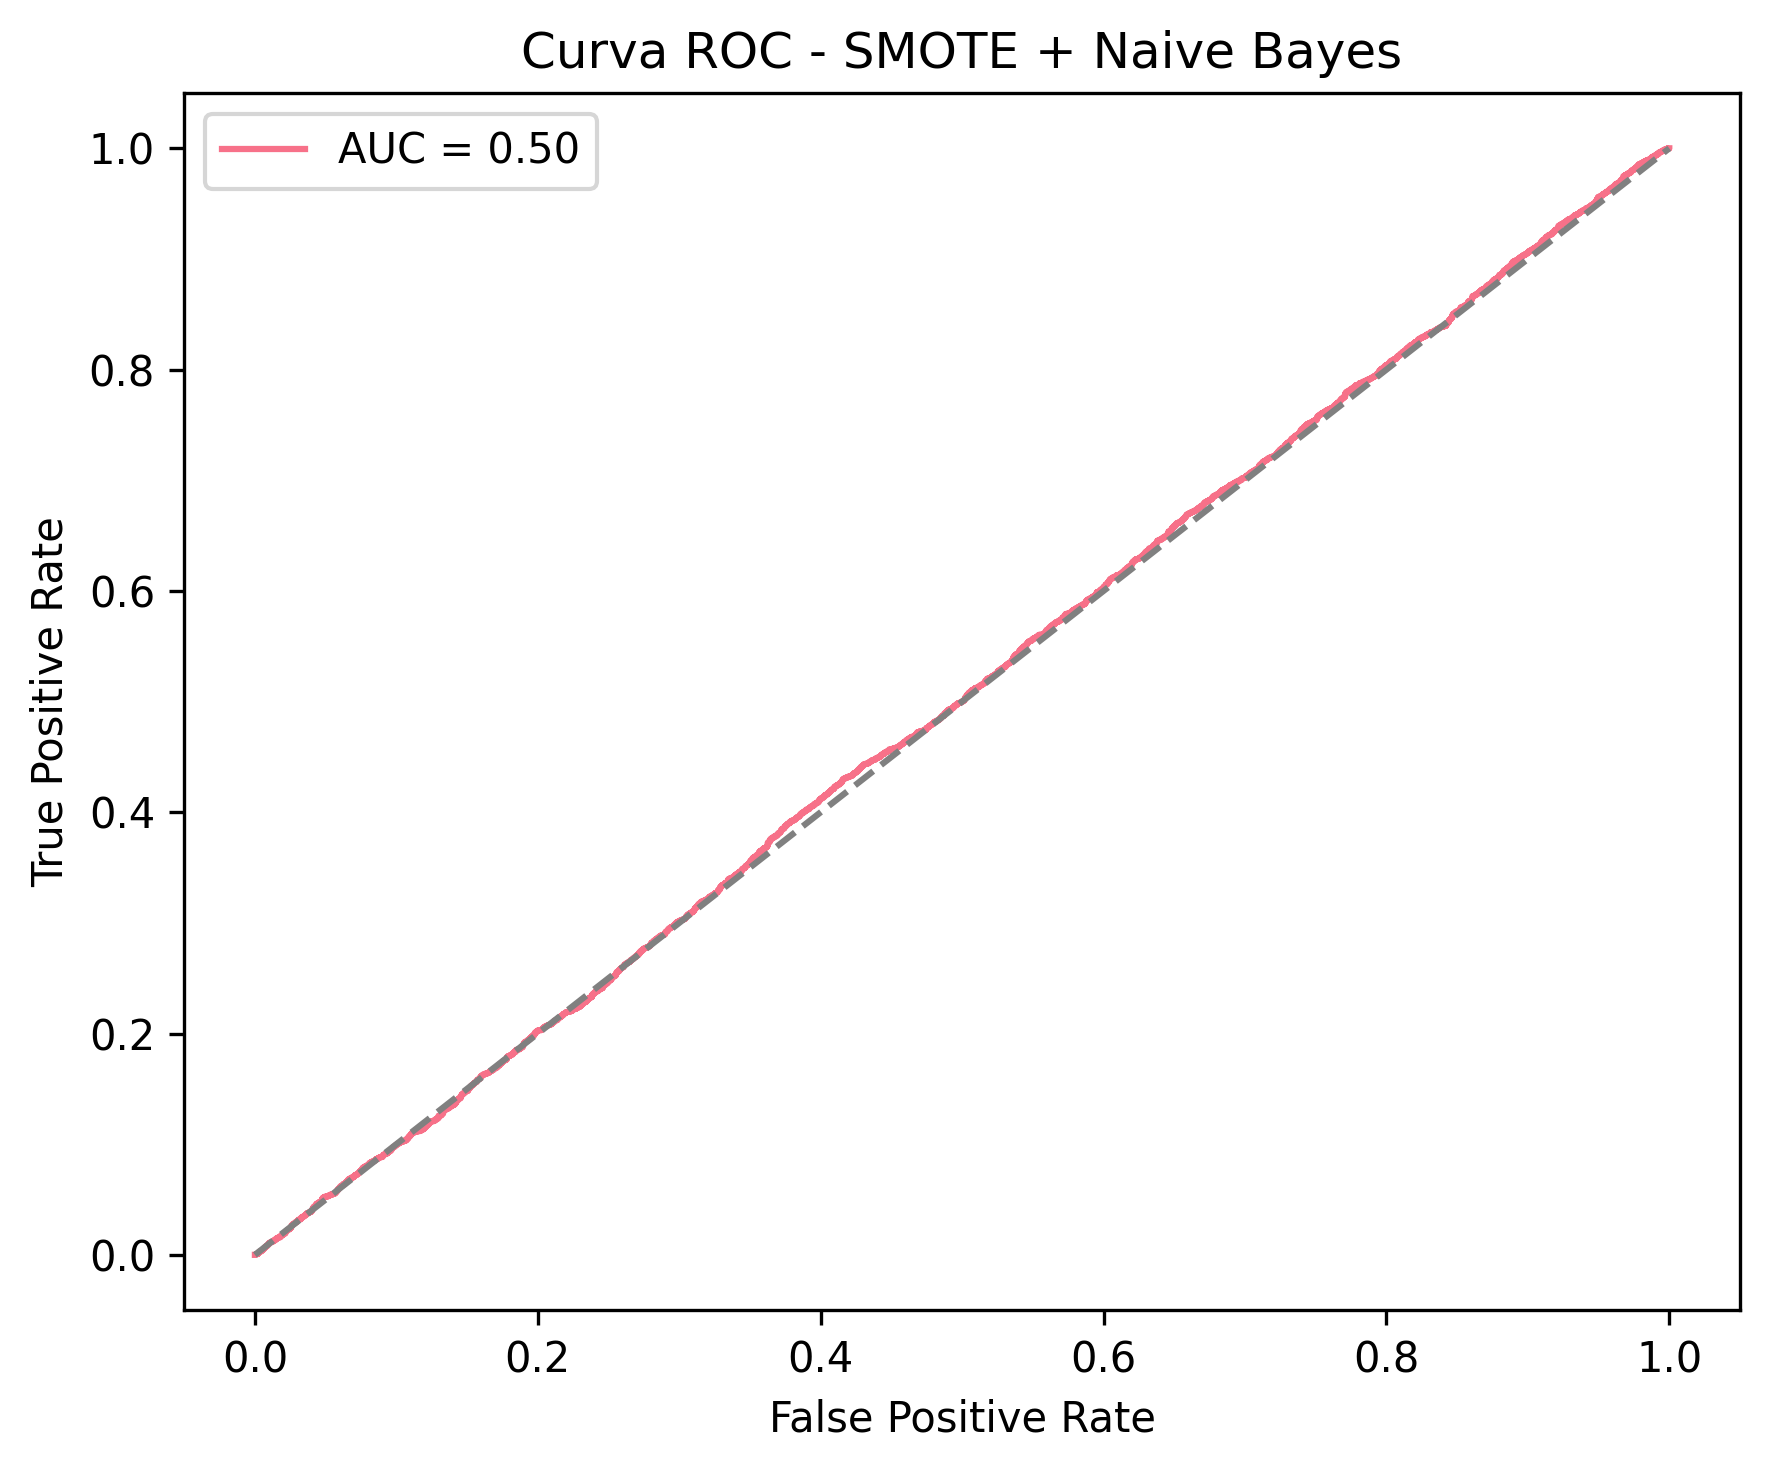

In [6]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.feature_selection import mutual_info_classif

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (classification_report, accuracy_score, precision_score,
                             recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score)
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.metrics import balanced_accuracy_score
from scipy.stats import gmean

# Set global style for plots
sns.set_palette("husl")
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

# Make output dirs if they don't exist
os.makedirs("graphs", exist_ok=True)
os.makedirs("cluster_graphs", exist_ok=True)

# ----------------------
# 1. DATA PREPARATION
# ----------------------
df = pd.read_csv('/content/drive/MyDrive/colorectal_cancer_prediction.csv')  # Replace with your file path

targets = ['Survival_Status', 'Chemotherapy_Received',
           'Radiotherapy_Received', 'Surgery_Received']
features = df.drop(columns=targets)

numeric_features = features.select_dtypes(include=np.number).columns.tolist()
categorical_features = features.select_dtypes(exclude=np.number).columns.tolist()

print("Start of data transformation...")

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

preprocessed_data = preprocessor.fit_transform(features)

numeric_names = numeric_features
categorical_names = preprocessor.named_transformers_['cat'].named_steps['onehot']\
    .get_feature_names_out(categorical_features)
all_feature_names = np.concatenate([numeric_names, categorical_names])

if hasattr(preprocessed_data, "toarray"):
    preprocessed_df = pd.DataFrame(preprocessed_data.toarray(), columns=all_feature_names)
else:
    preprocessed_df = pd.DataFrame(preprocessed_data, columns=all_feature_names)

print("End of data transformation...")

# ----------------------
# 2. MODELO COM OVERSAMPLING (SMOTE)
# ----------------------
from imblearn.over_sampling import SMOTE

target_var = 'Survival_Status'
y = df[target_var].copy()
if y.dtype == 'O':
    y = y.astype(str)
    y = y.map({label: idx for idx, label in enumerate(sorted(y.unique()))})

X_train, X_test, y_train, y_test = train_test_split(
    preprocessed_df, y, test_size=0.2, random_state=42, stratify=y
)

# Apenas oversampling
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

modelo = GaussianNB()
modelo.fit(X_train_resampled, y_train_resampled)
y_pred = modelo.predict(X_test)
y_prob = modelo.predict_proba(X_test)[:, 1] if len(modelo.classes_) == 2 else None

# Avaliação
print("\n=== Relatório de Classificação ===")
print(classification_report(y_test, y_pred))

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='binary')
rec = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')
bal_acc = balanced_accuracy_score(y_test, y_pred)
gmean_score = gmean([prec, rec]) if prec > 0 and rec > 0 else 0

print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"Balanced Accuracy: {bal_acc:.4f}")
print(f"Geometric Mean Accuracy: {gmean_score:.4f}")

# Matriz de confusão
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predito")
plt.ylabel("Verdadeiro")
plt.title("Matriz de Confusão - SMOTE + Naive Bayes")
plt.tight_layout()
plt.savefig("graphs/confusion_matrix_smote_naive_bayes.png")
plt.show()

# Curva ROC
if y_prob is not None:
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    auc_score = roc_auc_score(y_test, y_prob)
    plt.figure(figsize=(6, 5))
    plt.plot(fpr, tpr, label=f"AUC = {auc_score:.2f}")
    plt.plot([0, 1], [0, 1], '--', color='gray')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Curva ROC - SMOTE + Naive Bayes")
    plt.legend()
    plt.tight_layout()
    plt.savefig("graphs/roc_curve_smote_naive_bayes.png")
    plt.show()

# Naive Bayes Undersampling


Start of data transformation...
End of data transformation...

=== Relatório de Classificação ===
              precision    recall  f1-score   support

           0       0.26      0.61      0.36      4521
           1       0.76      0.41      0.53     13468

    accuracy                           0.46     17989
   macro avg       0.51      0.51      0.44     17989
weighted avg       0.63      0.46      0.49     17989

Accuracy: 0.4572
Precision: 0.7568
Recall: 0.4051
F1-score: 0.5277
Balanced Accuracy: 0.5087
Geometric Mean Accuracy: 0.5537


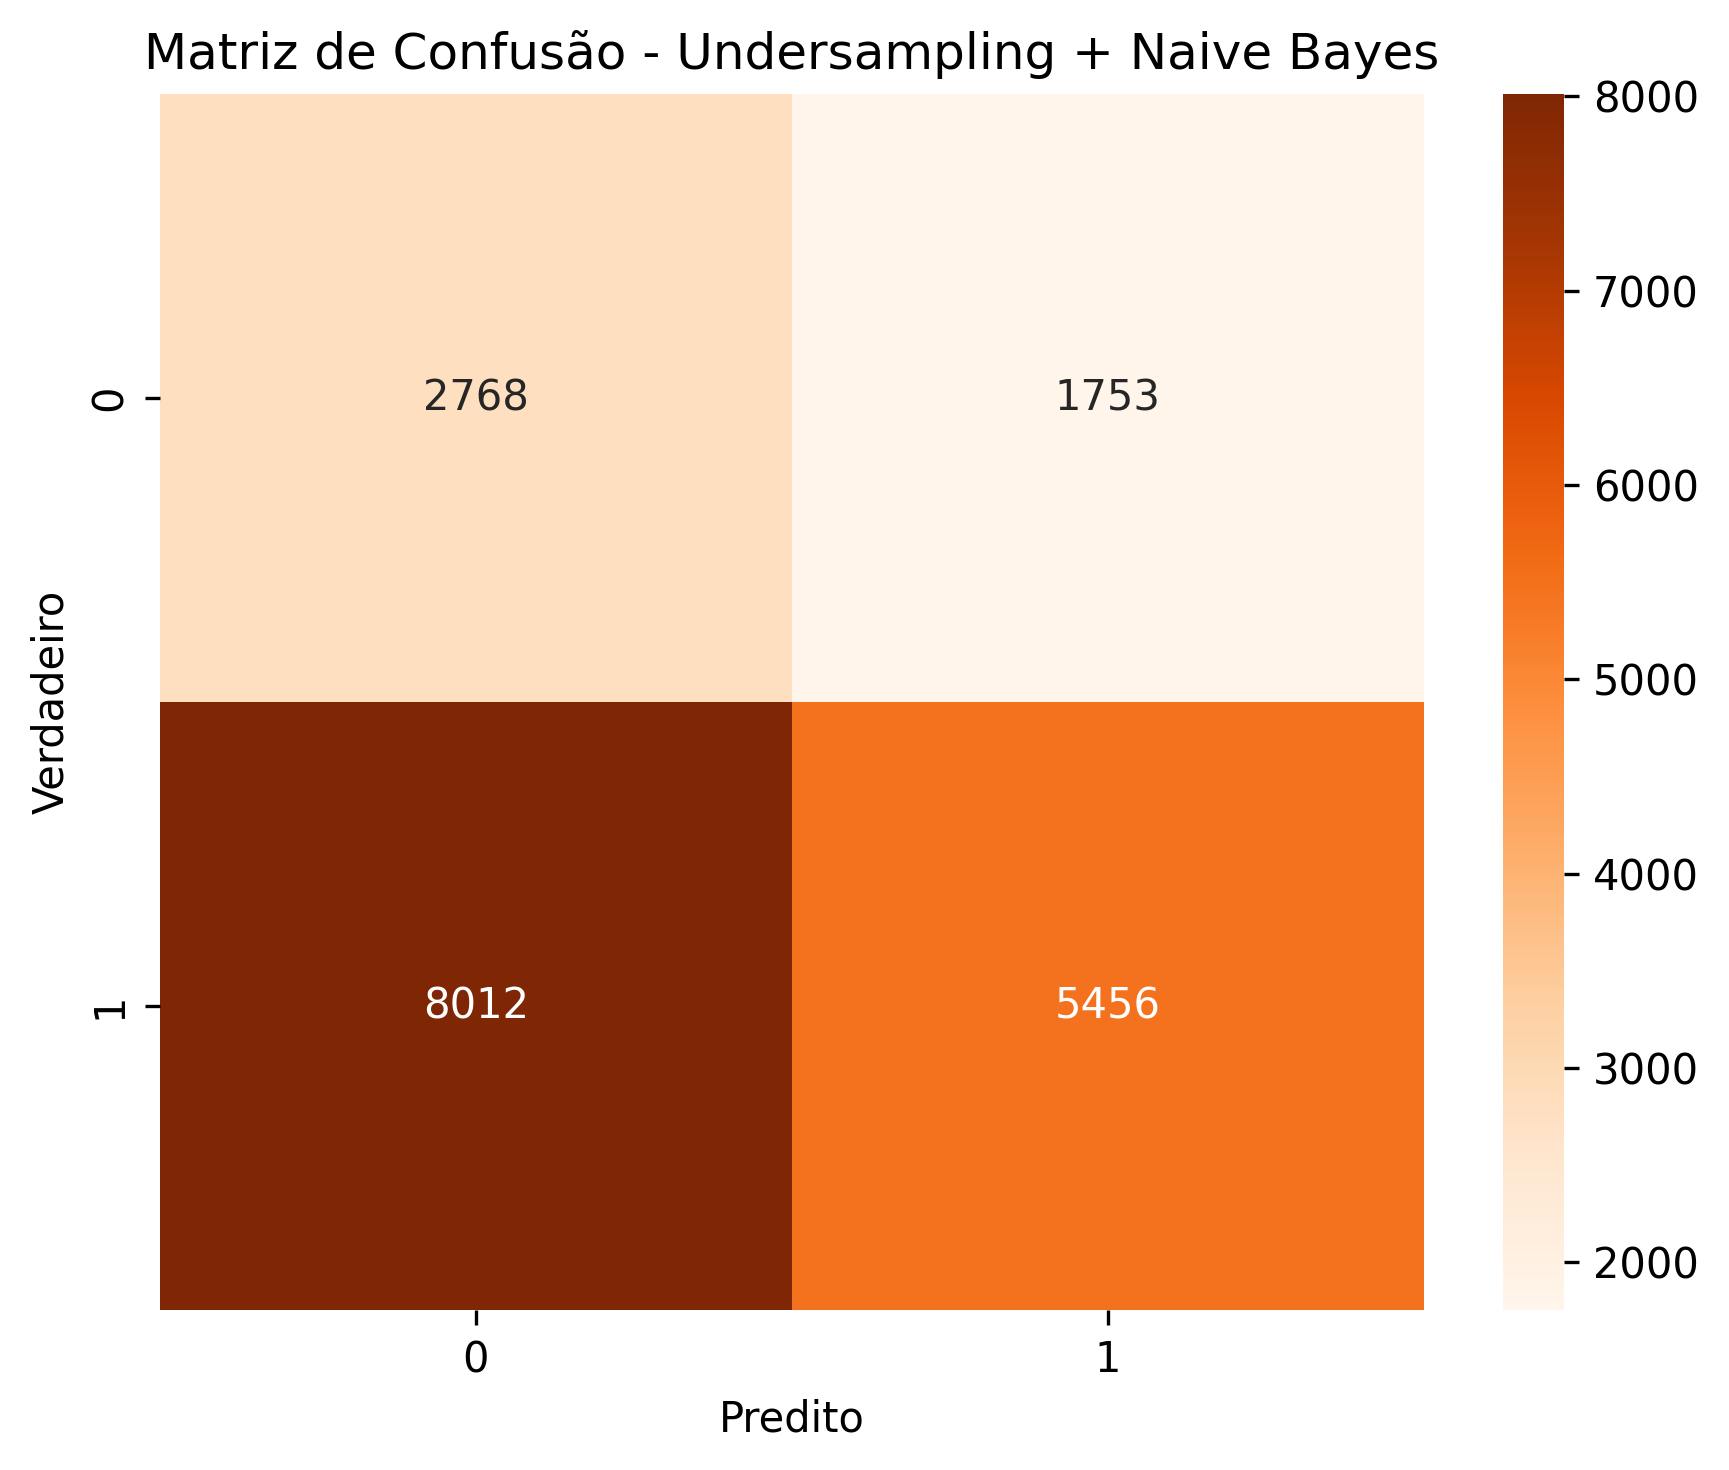

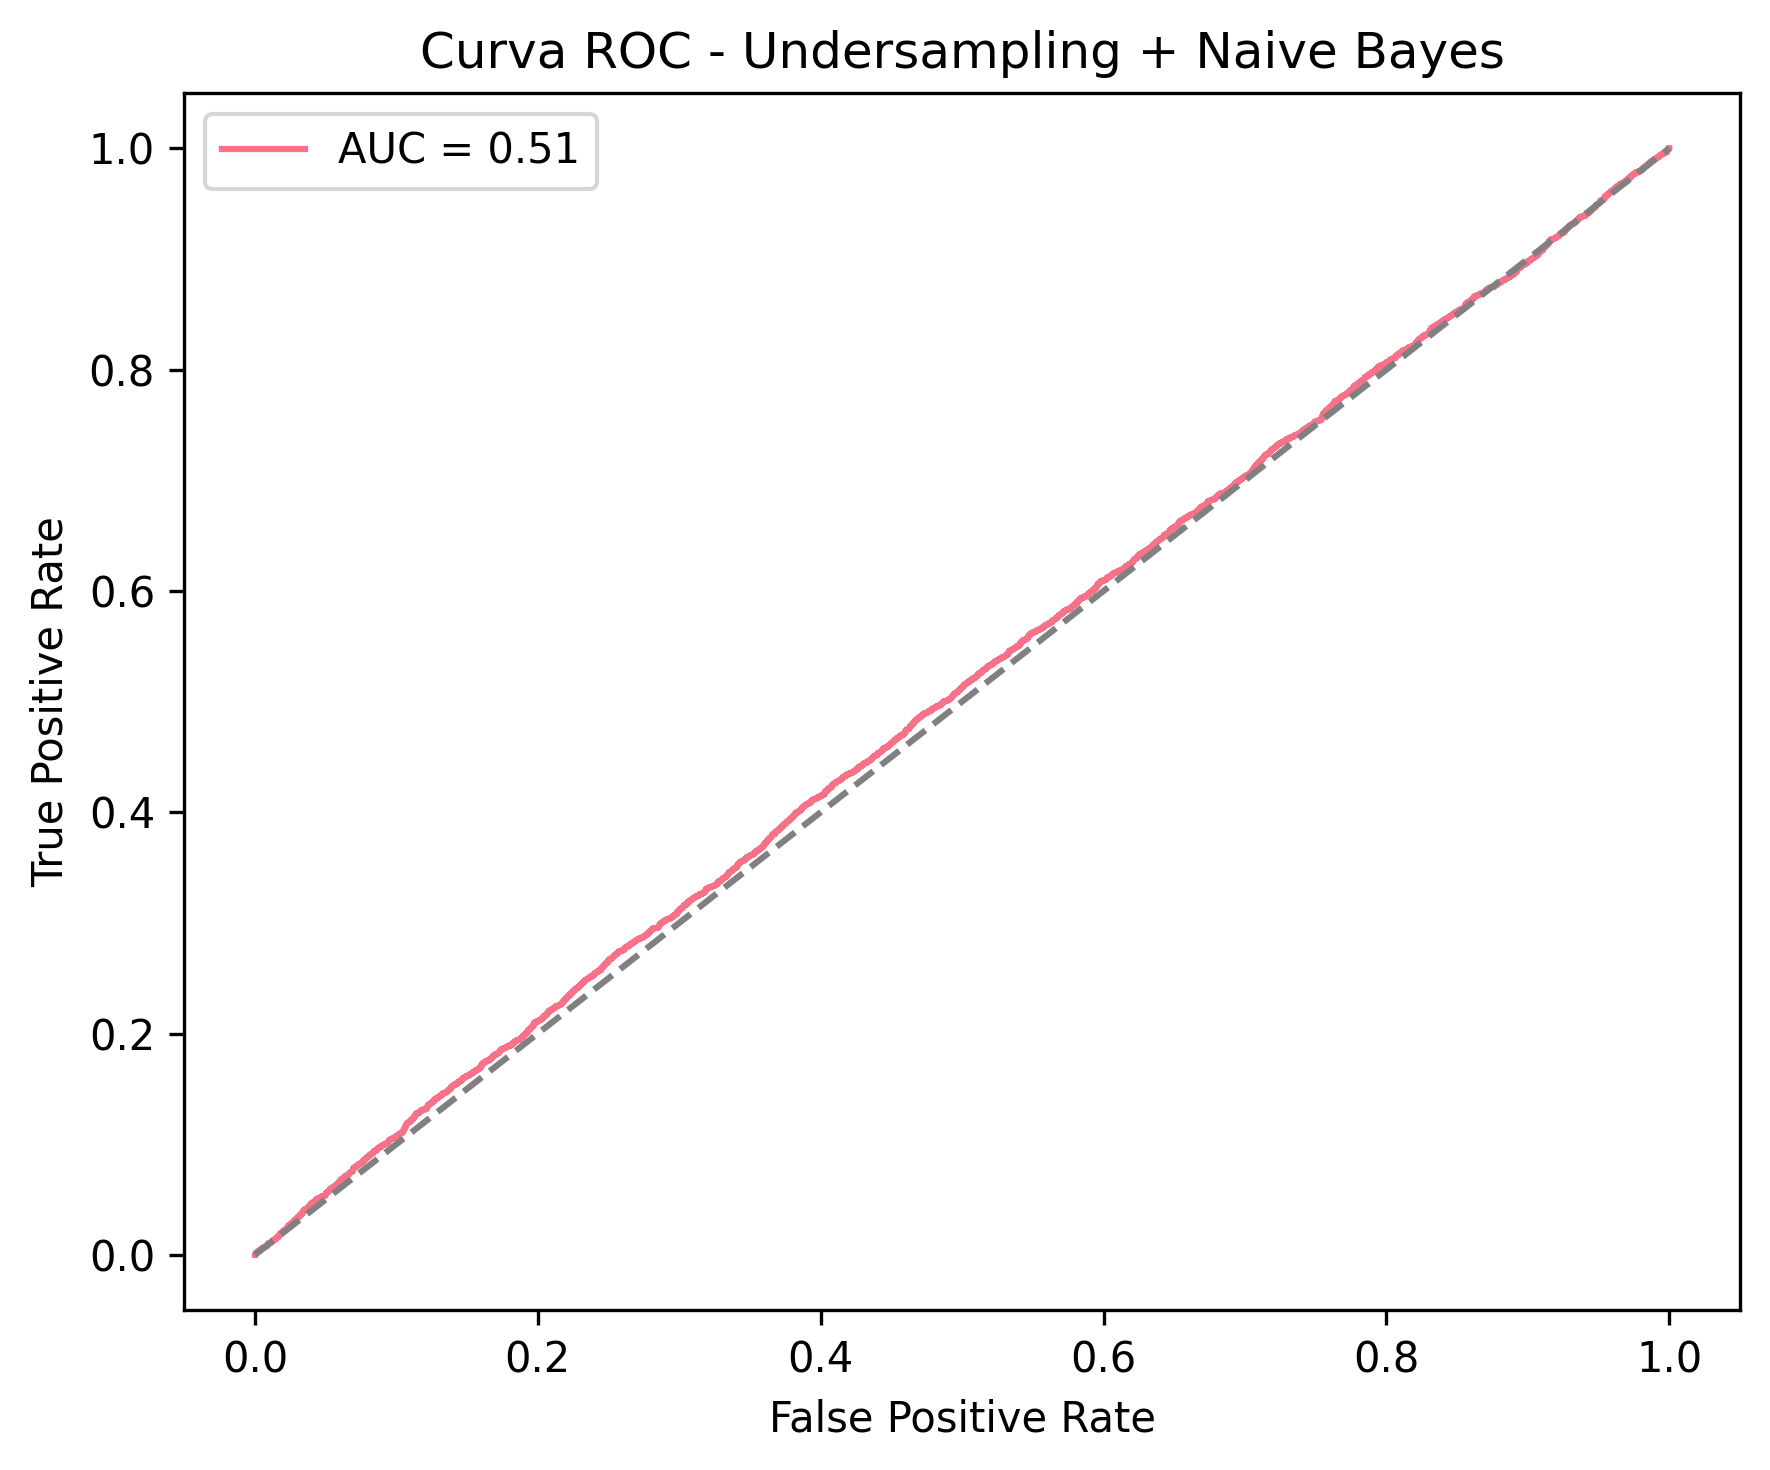

In [5]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.feature_selection import mutual_info_classif

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (classification_report, accuracy_score, precision_score,
                             recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score)
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.metrics import balanced_accuracy_score
from scipy.stats import gmean

# Set global style for plots
sns.set_palette("husl")
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

# Make output dirs if they don't exist
os.makedirs("graphs", exist_ok=True)
os.makedirs("cluster_graphs", exist_ok=True)

# ----------------------
# 1. DATA PREPARATION
# ----------------------
df = pd.read_csv('/content/drive/MyDrive/colorectal_cancer_prediction.csv')  # Replace with your file path

targets = ['Survival_Status', 'Chemotherapy_Received',
           'Radiotherapy_Received', 'Surgery_Received']
features = df.drop(columns=targets)

numeric_features = features.select_dtypes(include=np.number).columns.tolist()
categorical_features = features.select_dtypes(exclude=np.number).columns.tolist()

print("Start of data transformation...")

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

preprocessed_data = preprocessor.fit_transform(features)

numeric_names = numeric_features
categorical_names = preprocessor.named_transformers_['cat'].named_steps['onehot']\
    .get_feature_names_out(categorical_features)
all_feature_names = np.concatenate([numeric_names, categorical_names])

if hasattr(preprocessed_data, "toarray"):
    preprocessed_df = pd.DataFrame(preprocessed_data.toarray(), columns=all_feature_names)
else:
    preprocessed_df = pd.DataFrame(preprocessed_data, columns=all_feature_names)

print("End of data transformation...")

# ----------------------
# 2. MODELO COM UNDERSAMPLING
# ----------------------
from imblearn.under_sampling import RandomUnderSampler

target_var = 'Survival_Status'
y = df[target_var].copy()
if y.dtype == 'O':
    y = y.astype(str)
    y = y.map({label: idx for idx, label in enumerate(sorted(y.unique()))})

X_train, X_test, y_train, y_test = train_test_split(
    preprocessed_df, y, test_size=0.2, random_state=42, stratify=y
)

# Apenas undersampling
under = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = under.fit_resample(X_train, y_train)

modelo = GaussianNB()
modelo.fit(X_train_resampled, y_train_resampled)
y_pred = modelo.predict(X_test)
y_prob = modelo.predict_proba(X_test)[:, 1] if len(modelo.classes_) == 2 else None

# Avaliação
print("\n=== Relatório de Classificação ===")
print(classification_report(y_test, y_pred))

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='binary')
rec = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')
bal_acc = balanced_accuracy_score(y_test, y_pred)
gmean_score = gmean([prec, rec]) if prec > 0 and rec > 0 else 0

print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"Balanced Accuracy: {bal_acc:.4f}")
print(f"Geometric Mean Accuracy: {gmean_score:.4f}")

# Matriz de confusão
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Oranges')
plt.xlabel("Predito")
plt.ylabel("Verdadeiro")
plt.title("Matriz de Confusão - Undersampling + Naive Bayes")
plt.tight_layout()
plt.savefig("graphs/confusion_matrix_undersampling_naive_bayes.png")
plt.show()

# Curva ROC
if y_prob is not None:
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    auc_score = roc_auc_score(y_test, y_prob)
    plt.figure(figsize=(6, 5))
    plt.plot(fpr, tpr, label=f"AUC = {auc_score:.2f}")
    plt.plot([0, 1], [0, 1], '--', color='gray')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Curva ROC - Undersampling + Naive Bayes")
    plt.legend()
    plt.tight_layout()
    plt.savefig("graphs/roc_curve_undersampling_naive_bayes.png")
    plt.show()